In [2]:
import sys
sys.path.append("../src")
import pandas as pd
from dataLoad import dataLoad
import matplotlib.pyplot as plt

path= "../dataset/"
item_names_table, train_user_seq_log, test_user_label, test_user_seq_log = dataLoad(path)

# Test user Seq log & label

In [47]:
#label 
display(test_user_label)

print(f"총 데이터 len : {len(test_user_label):,}")
print(f"label | unique user 명수: {test_user_label.user.nunique():,}")
print(f"label | unique item 개수: {test_user_label.item_id.nunique():,}")
print(f"label | log 시작일시: {test_user_label["timestamp"].min()}")
print(f"label | log 종료일시: {test_user_label["timestamp"].max()}")

## 각 유저의 인터렉션 횟수 분포
test_label_item_count = test_user_label.user.value_counts()
print("\n")
print(f"유저 별 아이템 클릭수 평균: {test_label_item_count.mean():.2f}")
print(f"유저 별 아이템 클릭수 중앙값: {test_label_item_count.median()}")
print(f"유저 별 아이템 클릭수 최대: {test_label_item_count.max()}")
print(f"유저 별 아이템 클릭수 최소: {test_label_item_count.min()}")

,user,item_id,timestamp
0,0,223132,2021-05-10 21:38:12
1,1,28643,2021-05-11 21:12:24
2,2,77385,2021-05-12 09:26:39
3,3,552518,2021-04-07 23:02:18
4,4,421592,2021-05-11 11:29:14
...,...,...,...
587481,829386,809766,2021-05-12 12:57:34
587482,829390,573971,2021-05-12 12:59:00
587483,829393,389458,2021-05-12 12:57:33
587484,829397,19346,2021-05-12 13:01:17


총 데이터 len : 587,486
label | unique user 명수: 587,486
label | unique item 개수: 118,623
label | log 시작일시: 2021-02-11 13:06:10
label | log 종료일시: 2021-05-12 13:03:41


유저 별 아이템 클릭수 평균: 1.00
유저 별 아이템 클릭수 중앙값: 1.0
유저 별 아이템 클릭수 최대: 1
유저 별 아이템 클릭수 최소: 1


In [48]:
display(test_user_seq_log)

print(f"총 데이터 len: {len(test_user_seq_log):,}")
print(f"test | unique user 명수: {test_user_seq_log.user.nunique():,}")
print(f"test | unique item 개수: {test_user_seq_log.item_id.nunique():,}")
print(f"test | log 시작일시: {test_user_seq_log["timestamp"].min()}")
print(f"test | log 종료일시: {test_user_seq_log["timestamp"].max()}")

## 각 유저의 인터렉션 횟수 분포
test_user_item_count = test_user_seq_log.user.value_counts()
print("\n")
print(f"유저 별 아이템 클릭수 평균: {test_user_item_count.mean():.2f}")
print(f"유저 별 아이템 클릭수 중앙값: {test_user_item_count.median()}")
print(f"유저 별 아이템 클릭수 최대: {test_user_item_count.max()}")
print(f"유저 별 아이템 클릭수 최소: {test_user_item_count.min()}")

,user,item_id,timestamp
0,0,766598,2021-05-05 22:05:21
1,0,65273,2021-05-05 22:08:52
2,0,580437,2021-05-05 22:11:15
3,0,773271,2021-05-05 22:15:48
4,0,580437,2021-05-07 21:47:50
...,...,...,...
7025329,829403,263005,2021-05-12 13:01:01
7025330,829403,335217,2021-05-12 13:01:28
7025331,829403,628847,2021-05-12 13:01:35
7025332,829403,537578,2021-05-12 13:02:33


총 데이터 len: 7,025,334
test | unique user 명수: 587,486
test | unique item 개수: 522,005
test | log 시작일시: 2021-02-11 13:03:43
test | log 종료일시: 2021-05-12 13:03:27


유저 별 아이템 클릭수 평균: 11.96
유저 별 아이템 클릭수 중앙값: 12.0
유저 별 아이템 클릭수 최대: 20
유저 별 아이템 클릭수 최소: 2


In [28]:
assert test_user_label.user.nunique() == test_user_seq_log.user.nunique() 
print(test_user_seq_log.item_id.nunique() - test_user_label.item_id.nunique())

# label과 test의 unique user 명수 동일
# label dataset의 unique item이 403382개 적음
# 대다수의 user가 마지막으로 같은(비슷한) 아이템을 클릭했음을 확인 가능

403382


# Train user Seq log

In [49]:
# display(train_user_seq_log)
print(f"총 데이터 count: {len(train_user_seq_log):,}")
print(f"train | unique user 명수: {train_user_seq_log.user.nunique():,}")
print(f"train | unique item 개수: {train_user_seq_log.item_id.nunique():,}")
print(f"train | log 시작일시: {train_user_seq_log["timestamp"].min()}")
print(f"train | log 종료일시: {train_user_seq_log["timestamp"].max()}")

총 데이터 count: 32,134,199
train | unique user 명수: 672,116
train | unique item 개수: 943,402
train | log 시작일시: 2021-02-11 13:03:42
train | log 종료일시: 2021-05-12 13:03:27


In [30]:
assert train_user_seq_log.user.isna().sum() == 0 
print(f"train에만 존재하는 unique user 명수 : {train_user_seq_log.user.nunique() - test_user_seq_log.user.nunique():,}")
print(f"train의 중복 row 개수 : {train_user_seq_log.duplicated().sum():,}")

train에만 존재하는 unique user 명수 : 84,630
train의 중복 row 개수 : 3


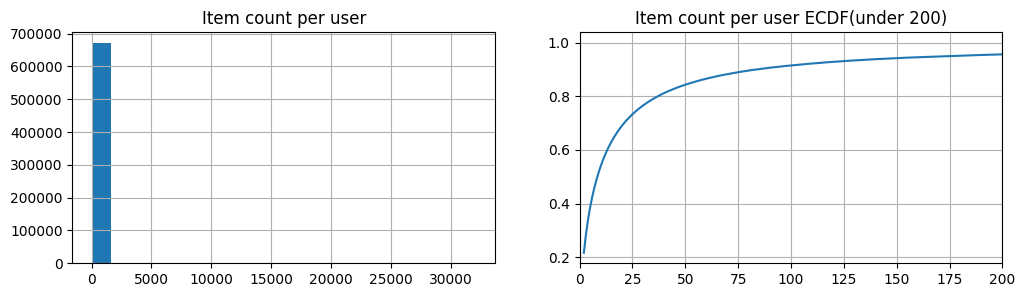

유저 별 아이템 클릭수 평균: 47.81
유저 별 아이템 클릭수 중앙값: 9.0
유저 별 아이템 클릭수 최대: 32049
유저 별 아이템 클릭수 최소: 2


In [52]:
## 각 유저의 인터렉션 횟수 분포
train_user_item_count = train_user_seq_log.user.value_counts()


plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
train_user_item_count.hist(bins=20)
plt.title("Item count per user")

plt.subplot(1,2,2)
train_user_item_count.value_counts(normalize=True).sort_index().cumsum().plot()
plt.title("Item count per user ECDF(under 200)")
plt.xlim(0,200)
plt.grid()
plt.show()

print(f"유저 별 아이템 클릭수 평균: {train_user_item_count.mean():.2f}")
print(f"유저 별 아이템 클릭수 중앙값: {train_user_item_count.median()}")
print(f"유저 별 아이템 클릭수 최대: {train_user_item_count.max()}")
print(f"유저 별 아이템 클릭수 최소: {train_user_item_count.min()}")

# item count per user 그래프 해설:
# 각 유저가 조회한 아이템 개수를 나타낸 히스토그램입니다.
# bin=3 임에도 불구하고 소수의 헤비유저가 존재해 그래프가 일정 수준 이상으로 상세해지지 않는 현상을 보입니다.

# item count per user ECDF(under 200) plot 해설 :  
# ECDF는 데이터셋에서 관측된 각 값이 주어진 분포의 몇 퍼센트에 해당하는지 나타낸 그래프입니다. 
# 각 사용자별 아이템 개수가 200 이하인 경우에 대한 ECDF를 나타낸 그래프이며, 
# 각 x축의 값에 해당하는 y축 값은 해당 x축 값이 데이터셋에서 주어진 분포의 몇 퍼센트에 해당하는지를 나타냅니다.
# 본 그래프에서는 유저 별 25개 정도의 아이템을 클릭했을 때가 서비스 안착 분기점임을 알 수 있습니다.

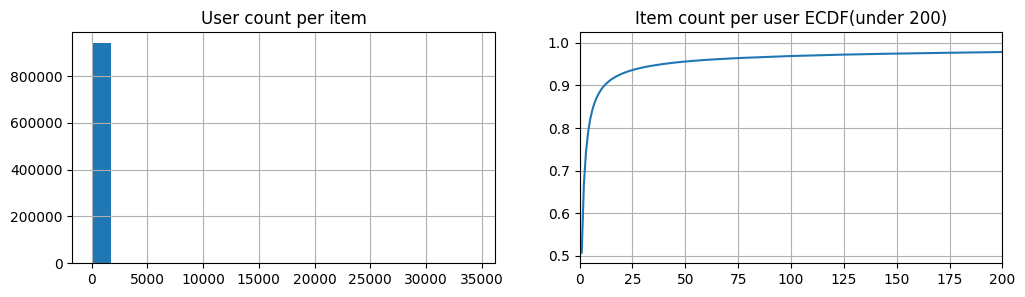

아이템 별 유저 조회수 평균: 34.06
아이템 별 유저 조회수 중앙값: 1.0
아이템 별 유저 조회수 최대: 34458
아이템 별 유저 조회수 최소: 1


In [51]:
## 아이템 조회 횟수 분포
train_item_user_count = train_user_seq_log.item_id.value_counts()

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
train_item_user_count.hist(bins=20)
plt.title("User count per item")

plt.subplot(1,2,2)
train_item_user_count.value_counts(normalize=True).sort_index().cumsum().plot()
plt.title("Item count per user ECDF(under 200)")
plt.xlim(0,200)
plt.grid()
plt.show()

print(f"아이템 별 유저 조회수 평균: {train_item_user_count.mean():.2f}")
print(f"아이템 별 유저 조회수 중앙값: {train_item_user_count.median()}")
print(f"아이템 별 유저 조회수 최대: {train_item_user_count.max()}")
print(f"아이템 별 유저 조회수 최소: {train_item_user_count.min()}")

# item count per user 그래프 해설:
# 각 아이템이 유저들에게 조회된 횟수를 나타낸 히스토그램입니다.
# bin=3 임에도 불구하고 소수의 베스트셀러가 존재해 위 그래프와 같은 현상을 보입니다.

# item count per user ECDF(under 200) plot 해설 :  
# 조회된 횟수가 200 이하인 아이템에 대한 ECDF를 나타낸 그래프입니다. 
# 본 그래프에서는 아이템 별 25회 정도의 클릭이 있을 때부터 200회 클릭까지 비슷한 분포임을 알 수 있습니다.

In [64]:
threshold = 20
items_with_few_user = train_item_user_count.value_counts().sort_index().head(threshold).reset_index()
items_with_few_user.columns = ["click_user_count", "item_count"]
total_item_count = train_user_seq_log.item_id.nunique()
items_with_few_user_count = items_with_few_user.item_count.sum()

print(f"조회한 유저가 {threshold}명 이하인 아이템 수: {items_with_few_user_count:,}({items_with_few_user_count / total_item_count * 100:.2f}%)")
display(items_with_few_user)

# 굉장히 클릭이 편중되어 있는 상황. 유저가 조회하는 인기품목이 정해져 있다. mp의 영향이 매우 강함.

조회한 유저가 20명 이하인 아이템 수: 874,994(92.75%)


,click_user_count,item_count
0,1,478607
1,2,150162
2,3,72418
3,4,43712
4,5,29169
5,6,20251
6,7,15283
7,8,11736
8,9,9360
9,10,7765


In [34]:
mp_threshold = 500
items_with_user = train_item_user_count.value_counts().sort_index(ascending=False).head(mp_threshold).reset_index()
items_with_user.columns = ["click_user_count", "item_count"]
total_item_count = train_user_seq_log.item_id.nunique()
items_with_user_count = items_with_user.item_count.sum()
item_count_sum = items_with_user["click_user_count"].sum()

print(f"조회한 횟수가 상위 {mp_threshold}에 드는 아이템 수: {items_with_user_count:,}개({items_with_user_count / total_item_count * 100:.2f}%)")
print(f"상위 {mp_threshold}개의 아이템이 만들어낸 조회수 : {item_count_sum:,}건({item_count_sum / len(train_user_seq_log) * 100:.2f}%)")
display(items_with_user)

조회한 횟수가 상위 500에 드는 아이템 수: 518개(0.05%)
상위 500개의 아이템이 만들어낸 조회수 : 5,987,690건(18.63%)


,click_user_count,item_count
0,34458,1
1,32311,1
2,31680,1
3,27557,1
4,26943,1
...,...,...
495,7755,1
496,7747,1
497,7744,1
498,7740,1


In [35]:
Density = len(train_user_seq_log) / (train_user_seq_log.user.nunique() * train_user_seq_log.item_id.nunique())
print(f"Density: {Density:.4f}")

#  유저수*상품종류수(가능한 경우의 수)에 비해 로그 len 작음. 
#  결론 : 유저의 상품조회 폭이 작다.
#  한 유저가 탐색하는 상품이 n개로 정해져 있고, 탐색 풀이 좁으며, 본 아이템들 중 계속 조회하는 아이템이 n개로 정해져 있다

Density: 0.0001


In [36]:
item_click_count = train_user_seq_log.groupby("item_id").size().reset_index(name="click_count").sort_values(by="click_count")
item_click_count.corr()

#item number와 click count 사이에 유의미한 상관관계 없음

# auto incremental을 고려한 가정 : 만약 오래된 아이템일수록 더 작은 item_id 넘버를 가진다면, 작은 숫자 id의 click 횟수가 훨씬 높을 수 있다
# 그러나 위와 같은 가정은 전혀 적용되지 않는 것으로 판단됨.

,item_id,click_count
item_id,1.0000,-0.0005
click_count,-0.0005,1.0000


# item name table

In [58]:
item_names_table

,item_id,item_name
0,0,DA 남자 빅사이즈 절개 맨투맨 절개 트레이닝팬츠 SET
1,1,텐피엠 [카시오] MTP-V005L 남성가죽시계+ 블랙 나토밴드.
2,2,[바보사랑]여성 옥스퍼드 로퍼-(주)태블리스
3,3,[해외][블랙모어스] 리프리놀/ 초록홍합 100캡슐 X 3
4,4,[백화점 SAY][크로커다일]경량덕 다운 점퍼(CL9WDW901)
...,...,...
970240,970240,접이식 벤치의자 스툴 스탠드 의자 홈바 인테리어 카페
970241,970241,[오너클랜]기획 신발정리대 소형 6단 1P 현관신발장 오픈신발장
970242,970242,[피우다][피우다 (PIUDA)] 여름바다 상자 3p 세트 (수납함/수납
970243,970243,[지큐][지큐/쿨제이][빅사이즈 추가] 모자이크 롱 숄 가디건


In [59]:
uniq_item_count = item_names_table.item_id.nunique()
print(f"유니크한 item 수: {uniq_item_count:,}")
print(f"train에서 조회되지 않은 아이템 수 : {uniq_item_count-train_user_seq_log.item_id.nunique():,}")

유니크한 item 수: 970,245
train에서 조회되지 않은 아이템 수 : 26,843


In [60]:
# 가장 많이 조회된 아이템 top6

display(item_names_table[item_names_table["item_id"]==722418])
display(item_names_table[item_names_table["item_id"]==813182])
display(item_names_table[item_names_table["item_id"]==589812])
display(item_names_table[item_names_table["item_id"]==803187])
display(item_names_table[item_names_table["item_id"]==965347])
display(item_names_table[item_names_table["item_id"]==270167])

,item_id,item_name
722418,722418,21SS최신상 진심을담은 날씬핏 NEW 라삐아프 라이크라 와이드 데님3종


,item_id,item_name
813182,813182,브리엘 프릴넥 니트 4종


,item_id,item_name
589812,589812,브리엘 벨티드 리얼데님재킷


,item_id,item_name
803187,803187,[be+wants]비원츠 안티에이징 피토 글로우 톤업 크림 방송 패키지


,item_id,item_name
965347,965347,"21년 봄 최신상, 여유있는 루즈한 핏과 드롭숄더, 필수컬러 조합 나인식스뉴욕 96..."


,item_id,item_name
270167,270167,[국내생산/100매] 타스 새부리형 KF-94 마스크 블랙


# Full Data 유저 행동경향 파악

In [3]:
full_df = pd.concat([train_user_seq_log, test_user_seq_log, test_user_label], ignore_index=True).drop_duplicates()

In [ ]:
# 일자별 click 집계
full_df = full_df.assign(log_date = full_df.timestamp.dt.floor("D"))

full_df.timestamp.dt.floor("D").value_counts().sort_index().plot(figsize=(15,6))
plt.title("Daily log count")
plt.xlabel("Date")
plt.ylabel("History Log Count")
plt.show()

In [ ]:
full_df.timestamp.min(), full_df.timestamp.max(), full_df.timestamp.nunique()

##  리텐션 비율 확인

In [ ]:
def Revisit_rate(n, full_df):
    df_nPlus = full_df.groupby("user").filter(lambda x: x["timestamp"].count() >= n)
    df_nPlus1 = df_nPlus[df_nPlus.groupby(["user"])["timestamp"].transform("count") >= (n+1)]
    ratio = df_nPlus1["user"].nunique() / df_nPlus["user"].nunique()

    print(f"{n}번 접속한 유저 중, {n+1}번 접속하는 유저 비율 : {round(ratio,2)}%")

In [ ]:
# %%time
# Revisit_rate(9, full_df)  # eda로 확인한 중앙값 반영

"""
9번 접속한 유저 중, 10번 접속하는 유저 비율 : 0.94%

1번 접속한 유저 중, 2번 접속하는 유저 비율 : 1.0%
2번 접속한 유저 중, 3번 접속하는 유저 비율 : 0.87%
3번 접속한 유저 중, 4번 접속하는 유저 비율 : 0.9%
5번 접속한 유저 중, 6번 접속하는 유저 비율 : 0.92%
7번 접속한 유저 중, 8번 접속하는 유저 비율 : 0.94%
20번 접속한 유저 중, 21번 접속하는 유저 비율 : 0.97%
"""
# 일자로 집계한 유저 재방문 주기 (리텐션)은 높은 편

## 아이템 중복조회 경험이 있는 유저 비율

In [5]:
reclick_users = full_df.groupby(["user", "item_id"])["timestamp"].count().reset_index()
reclick_users = reclick_users[reclick_users["timestamp"] > 1]
user_ratio =  reclick_users["user"].nunique() / full_df["user"].nunique()

print(f"한 아이템을 2번 이상 조회한 경험이 있는 유저 비율 : {round(user_ratio,2)}%")

한 아이템을 2번 이상 조회한 경험이 있는 유저 비율 : 0.54%


In [21]:
reclick_users2 = reclick_users[reclick_users["timestamp"] > 1]
reclick_count = reclick_users2["timestamp"].mean()

print(f"중복 조회 경험이 있는 유저들의 평균 재조회 횟수 : {round(reclick_count,2)}회")

중복 조회 경험이 있는 유저들의 평균 재조회 횟수 : 2.72회


In [23]:
reclick_users[reclick_users["timestamp"] > 1].describe()["timestamp"]

count    4.616464e+06
mean     2.724428e+00
std      1.727283e+00
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.990000e+02
Name: timestamp, dtype: float64